In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [585]:
df = pd.read_excel("drive/MyDrive/Pusula Talent Case/side_effect_data 1.xlsx")

In [480]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [357]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Dogum_Tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Ilac_Baslangic_Tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki_Bildirim_Tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
Kilo,2064.0,80.863857,50.0,65.0,83.0,96.0,110.0,18.635269
Boy,2243.0,174.638431,145.0,160.0,176.0,187.0,203.0,16.516552


In [358]:
df.isnull().sum() # her sütundaki eksik veri sayısı

,0
Kullanici_id,0
Cinsiyet,778
Dogum_Tarihi,0
Uyruk,0
Il,227
Ilac_Adi,0
Ilac_Baslangic_Tarihi,0
Ilac_Bitis_Tarihi,0
Yan_Etki,0
Yan_Etki_Bildirim_Tarihi,0


In [359]:
df.duplicated().sum() # dataframe'deki dublike verilerin sayısı

0

In [586]:
# sütunları yeniden isimlendirme
df = df.rename({'Kullanici_id' : 'Kullanici ID',
                'Dogum_Tarihi' : 'Dogum Tarihi',
                'Ilac_Adi' : 'Ilac Adi',
                'Ilac_Baslangic_Tarihi':'Ilac Baslangic Tarihi',
                'Ilac_Bitis_Tarihi':'Ilac Bitis Tarihi',
                'Yan_Etki':'Yan Etki',
                'Yan_Etki_Bildirim_Tarihi':'Yan Etki Bildirim Tarihi'}, axis = 1)

In [361]:
df.head()

,Kullanici ID,Cinsiyet,Dogum Tarihi,Uyruk,Il,Ilac Adi,Ilac Baslangic Tarihi,Ilac Bitis Tarihi,Yan Etki,Yan Etki Bildirim Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [362]:
df["Ilac Adi"].nunique() # kaç farklı ilaç adı var

151

In [363]:
df["Uyruk"].value_counts() # hangi uyruktan kaç tane var

,count
Uyruk,
Turkiye,2357


In [364]:
count_il = df["Il"].value_counts()
df["Il"].value_counts() # hangi ilden kaç tane var

,count
Il,
Adana,220
Mersin,207
Trabzon,195
Canakkale,179
Ankara,179
Eskisehir,174
Antalya,171
Bursa,169
Samsun,153


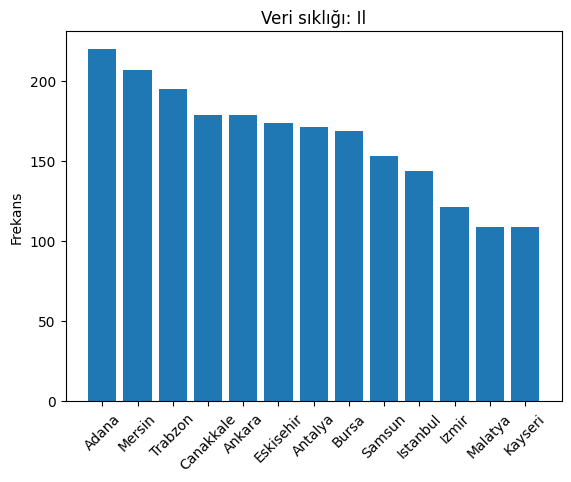

In [365]:
# İllerin sıklık grafiği
plt.figure()
plt.bar(count_il.index, count_il)
plt.xticks(count_il.index, count_il.index.values)
plt.xticks(rotation = 45)
plt.ylabel("Frekans")
plt.title("Veri sıklığı: Il")
plt.show()

In [366]:
df["Yan Etki"].nunique() # kaç farklı yan etki var

22

In [367]:
df["Yan Etki"].value_counts() # hangi yan etkiden kaç tane var

,count
Yan Etki,
Agizda Farkli Bir Tat,229
Tansiyon Yukselme,227
Yorgunluk,204
Gormede Bulaniklik,170
Kabizlik,156
Ishal,145
Az Uyuma,141
Terleme,97
Sinirlilik,81


([<matplotlib.patches.Wedge at 0x79eefd4595d0>,
 [Text(-0.17974725989486687, 1.085214689616892, 'Female'),
  Text(0.17974715828973364, -1.0852147064460405, 'Male')],
 [Text(-0.09804395994265465, 0.5919352852455774, '55.2%'),
  Text(0.09804390452167289, -0.5919352944251128, '44.8%')])

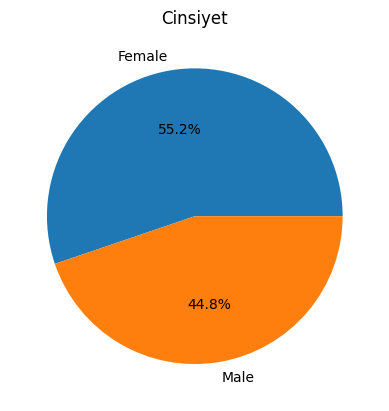

In [368]:
# cinsiyet dağılımının pasta grafiği ile gösterimi
x = df["Cinsiyet"].value_counts().reset_index()
plt.title("Cinsiyet")
plt.pie(x = x["count"], labels = x["Cinsiyet"], autopct = "%0.1f%%")

In [369]:
df["Kan Grubu"].value_counts() # hangi kan grubundan kaç tane var

,count
Kan Grubu,
AB RH-,421
0 RH+,275
B RH+,256
AB RH+,250
B RH-,233
0 RH-,232
A RH+,198
A RH-,145


([<matplotlib.patches.Wedge at 0x79ef00750d00>,
 [Text(0.8703283690428675, 0.6727024082305508, 'AB RH-'),
  Text(-0.191577336471132, 1.083188868180719, '0 RH+'),
  Text(-0.9285764259880851, 0.5896997720019863, 'B RH+'),
  Text(-1.0722564984937166, -0.24549134697173006, 'AB RH+'),
  Text(-0.6127345334842405, -0.9135405800925597, 'B RH-'),
  Text(0.1491167638756051, -1.0898459481648162, '0 RH-'),
  Text(0.7952440393704392, -0.759991393270863, 'A RH+'),
  Text(1.0718714846739568, -0.24716698878055635, 'A RH-')],
 [Text(0.47472456493247306, 0.36692858630757313, '20.9%'),
  Text(-0.10449672898425381, 0.5908302917349375, '13.7%'),
  Text(-0.5064962323571373, 0.3216544210919925, '12.7%'),
  Text(-0.5848671809965726, -0.1339043710754891, '12.4%'),
  Text(-0.3342188364459493, -0.49829486186866884, '11.6%'),
  Text(0.08133641665942096, -0.5944614262717178, '11.5%'),
  Text(0.4337694760202395, -0.4145407599659252, '9.9%'),
  Text(0.5846571734585219, -0.13481835751666707, '7.2%')])

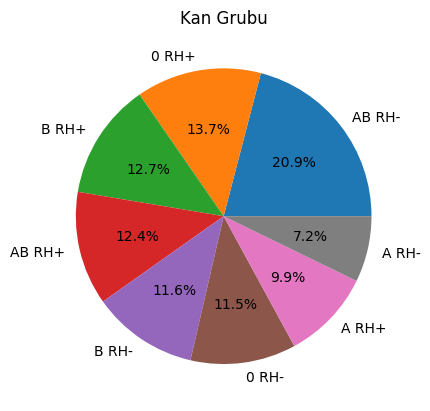

In [370]:
# kan grubu dağılımının pasta grafiği ile gösterimi
x = df["Kan Grubu"].value_counts().reset_index()
plt.title("Kan Grubu")
plt.pie(x = x["count"], labels = x["Kan Grubu"], autopct = "%0.1f%%")

In [587]:
# doğum gününden yaşı hesaplama
current_date = pd.to_datetime('today')
df['Yas'] = (current_date - df['Dogum Tarihi']).dt.days // 365

In [372]:
df.head()

,Kullanici ID,Cinsiyet,Dogum Tarihi,Uyruk,Il,Ilac Adi,Ilac Baslangic Tarihi,Ilac Bitis Tarihi,Yan Etki,Yan Etki Bildirim Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yas
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,64
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0,85
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,47
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0,47
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,48


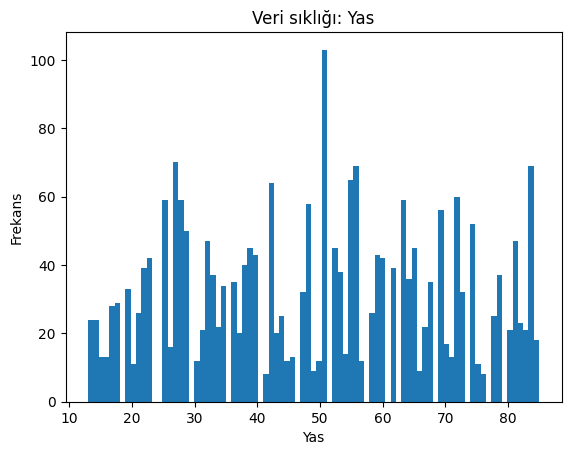

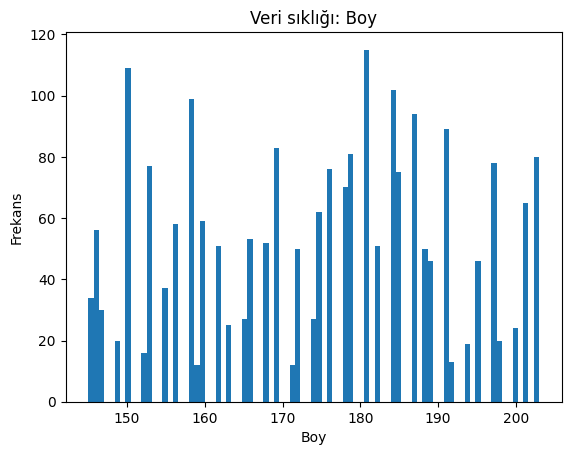

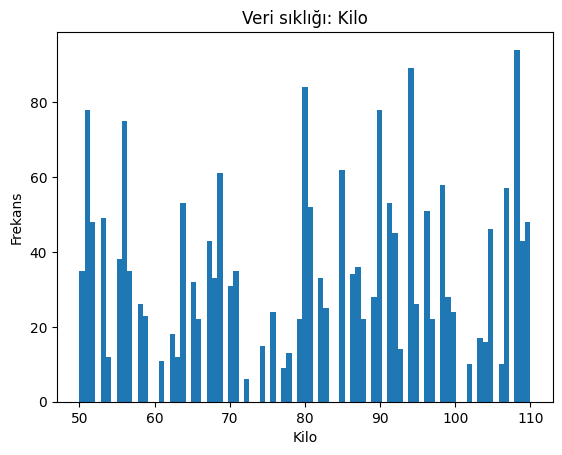

In [373]:
# Yaş, Boy ve Kilo değişkenleri için histogram grafiklerinin çizdirilmesi
for i in ["Yas","Boy","Kilo"]:
    plt.figure()
    plt.hist(df[i], bins = 85)
    plt.xlabel(i)
    plt.ylabel("Frekans")
    plt.title(f"Veri sıklığı: {i}")
    plt.show()

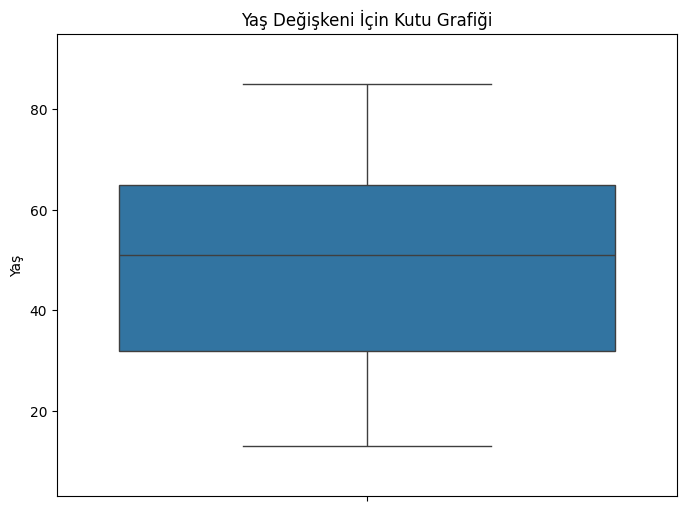

In [374]:
# yaş değişkeni için kutu grafiğinin çizdirilmesi
plt.figure(figsize=(8, 6))
sns.boxplot(y="Yas", data=df)
plt.ylim(df['Yas'].min() - 10, df['Yas'].max() + 10)
plt.title("Yaş Değişkeni İçin Kutu Grafiği")
plt.ylabel("Yaş")
plt.show()

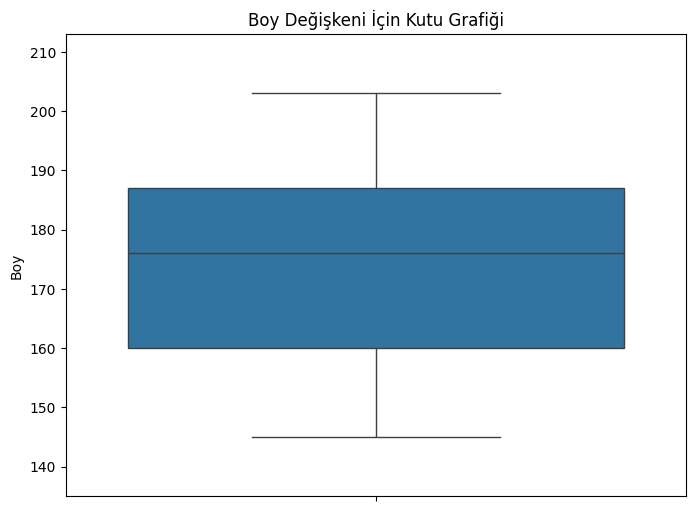

In [375]:
# boy değişkeni için kutu grafiğinin çizdirilmesi
plt.figure(figsize=(8, 6))
sns.boxplot(y="Boy", data=df)
plt.ylim(df['Boy'].min() - 10, df['Boy'].max() + 10)
plt.title("Boy Değişkeni İçin Kutu Grafiği")
plt.ylabel("Boy")
plt.show()

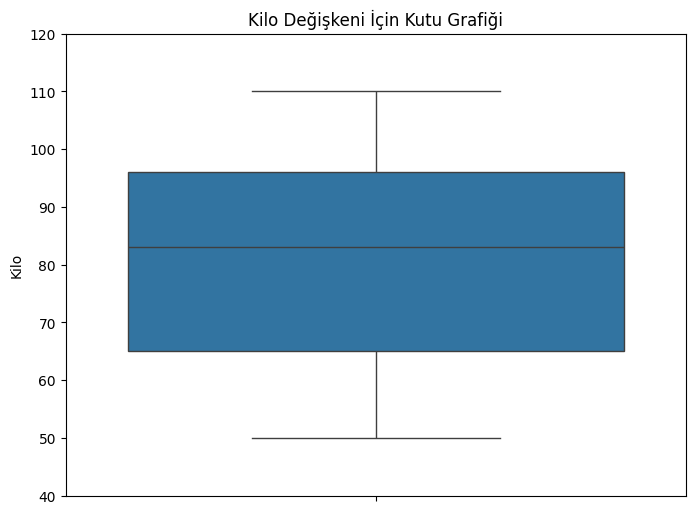

In [376]:
# kilo değişkeni için kutu grafiğinin çizdirilmesi
plt.figure(figsize=(8, 6))
sns.boxplot(y="Kilo", data=df)
plt.ylim(df['Kilo'].min() - 10, df['Kilo'].max() + 10)
plt.title("Kilo Değişkeni İçin Kutu Grafiği")
plt.ylabel("Kilo")
plt.show()

In [377]:
# yaş, boy ve kilo değişkenlerinin aralarındaki korelasyonun incelenmesi
df.loc[:,["Yas","Boy","Kilo"]].corr()

,Yas,Boy,Kilo
Yas,1.000000,-0.005610,0.027319
Boy,-0.005610,1.000000,-0.149016
Kilo,0.027319,-0.149016,1.000000


In [588]:
# ilac kullanım süresinin hesaplanması
df['Ilac Kullanim Suresi (Gun)'] = (df['Ilac Bitis Tarihi'] - df['Ilac Baslangic Tarihi']).dt.days

In [589]:
# yan etki ortaya çıkış süresinin hesaplanması
df['Yan Etki Ortaya Cikis Suresi (Gun)'] = (df['Yan Etki Bildirim Tarihi'] - df['Ilac Baslangic Tarihi']).dt.days

In [590]:
# işe yaramayacak sütunların kaldırılması
df.drop(columns=['Kullanici ID', 'Dogum Tarihi'], inplace=True)

In [381]:
df.head()

,Cinsiyet,Uyruk,Il,Ilac Adi,Ilac Baslangic Tarihi,Ilac Bitis Tarihi,Yan Etki,Yan Etki Bildirim Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun)
0,Male,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,64,54,41
1,Male,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0,85,58,25
2,Female,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,47,60,24
3,Male,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0,47,67,35
4,Female,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,48,52,30


In [591]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True) # boşluk karakterleri içeren ya da boş satırların NaN olarak değiştirilmesi

In [592]:
# kaç farklı kronik hastalık var
all_chronic_diseases = pd.Series(df['Kronik Hastaliklarim'].tolist() +
                                 df['Baba Kronik Hastaliklari'].tolist() +
                                 df['Anne Kronik Hastaliklari'].tolist() +
                                 df['Kiz Kardes Kronik Hastaliklari'].tolist() +
                                 df['Erkek Kardes Kronik Hastaliklari'].tolist())

all_chronic_diseases = all_chronic_diseases.str.split(',').explode().str.strip()
unique_chronic_diseases = all_chronic_diseases.dropna().unique()

print(f"Toplam {len(unique_chronic_diseases)} farklı kronik hastalık var:")
print(unique_chronic_diseases)

Toplam 11 farklı kronik hastalık var:
['Hipertansiyon' 'Kan Hastaliklari' 'Kalp Hastaliklari' 'Diyabet' 'Diger'
 'KOAH' 'Astim' 'Kemik Erimesi' 'Kanser' 'Alzheimer' 'Guatr']


In [593]:
# hangi kronik hastalıktan kaç tane var
count_chronic_diseases = all_chronic_diseases.value_counts()
count_chronic_diseases

,count
Kemik Erimesi,2003
Alzheimer,1924
Kan Hastaliklari,1853
Astim,1822
Kalp Hastaliklari,1797
Hipertansiyon,1779
Diyabet,1770
KOAH,1763
Kanser,1702
Guatr,1610


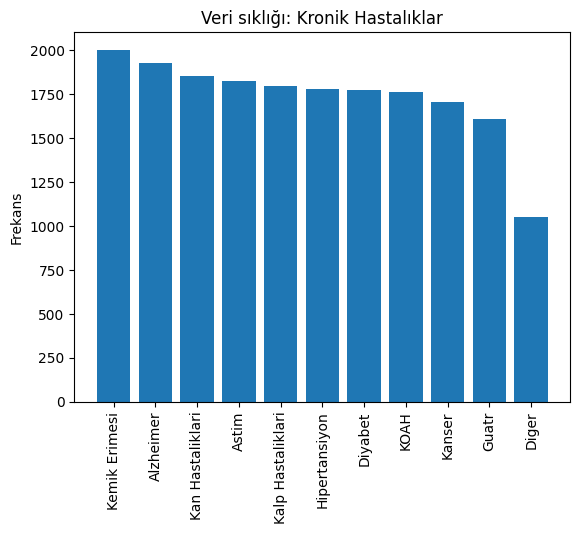

In [385]:
# kronik hastalık verileri için sıklık grafiğinin çizilmesi
plt.figure()
plt.bar(count_chronic_diseases.index, count_chronic_diseases)
plt.xticks(count_chronic_diseases.index, count_chronic_diseases.index.values)
plt.xticks(rotation = 90)
plt.ylabel("Frekans")
plt.title("Veri sıklığı: Kronik Hastalıklar")
plt.show()

In [594]:
# ailedeki kronik hastalıkları birleştirme
def combine_conditions(row):
    conditions = set()  # Set kullanarak tekrarları önler
    if pd.notna(row['Baba Kronik Hastaliklari']):
        conditions.update(row['Baba Kronik Hastaliklari'].split(', '))
    if pd.notna(row['Anne Kronik Hastaliklari']):
        conditions.update(row['Anne Kronik Hastaliklari'].split(', '))
    if pd.notna(row['Kiz Kardes Kronik Hastaliklari']):
        conditions.update(row['Kiz Kardes Kronik Hastaliklari'].split(', '))
    if pd.notna(row['Erkek Kardes Kronik Hastaliklari']):
        conditions.update(row['Erkek Kardes Kronik Hastaliklari'].split(', '))

    # Virgülle birleştir
    return ', '.join(sorted(conditions))

In [595]:
# ailedeki tüm kronik hastalıkları birleştirerek tek bir sütun haline getirme
df['Ailedeki Kronik Hastaliklar'] = df.apply(combine_conditions, axis=1)
df.head()

,Cinsiyet,Uyruk,Il,Ilac Adi,Ilac Baslangic Tarihi,Ilac Bitis Tarihi,Yan Etki,Yan Etki Bildirim Tarihi,Alerjilerim,Kronik Hastaliklarim,...,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Ailedeki Kronik Hastaliklar
0,Male,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari",...,KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,64,54,41,"Guatr, Hipertansiyon, KOAH, Kalp Hastaliklari,..."
1,Male,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,...,"Hipertansiyon, Kalp Hastaliklari",NaN,"KOAH, Diyabet",NaN,81.0,181.0,85,58,25,"Diger, Diyabet, Guatr, Hipertansiyon, KOAH, Ka..."
2,Female,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet",...,"Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,47,60,24,"Diger, Diyabet, KOAH, Kemik Erimesi"
3,Male,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger",...,NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0,47,67,35,"Astim, Diger, Kalp Hastaliklari, Kanser"
4,Female,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari",...,"Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,48,52,30,"Alzheimer, Diger, Diyabet, Hipertansiyon, Kan ..."


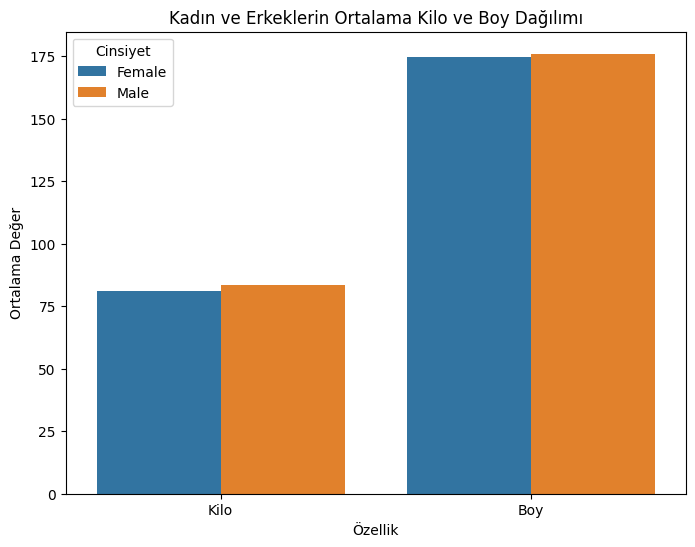

In [388]:
# cinsiyete bağlı ortalama kilo ve boy grafiği
gender_means = df.groupby('Cinsiyet').agg({'Kilo': 'mean', 'Boy': 'mean'}).reset_index()
gender_means_melted = gender_means.melt(id_vars="Cinsiyet", var_name="Özellik", value_name="Ortalama")

plt.figure(figsize=(8, 6))
sns.barplot(x='Özellik', y='Ortalama', hue='Cinsiyet', data=gender_means_melted)

plt.title('Kadın ve Erkeklerin Ortalama Kilo ve Boy Dağılımı')
plt.xlabel('Özellik')
plt.ylabel('Ortalama Değer')

plt.show()

In [596]:
# boy ve kilo sütunlarındaki eksik verileri yaş bilgisinden de yararlanarak KNNImputer ile doldurma
selected_data = df[['Yas', 'Boy', 'Kilo']]
knn_imputer = KNNImputer(n_neighbors = 3)
imputed_data = knn_imputer.fit_transform(selected_data)
imputed_df = pd.DataFrame(imputed_data, columns = ['Yas', 'Boy', 'Kilo'])

In [597]:
imputed_df.head()

,Yas,Boy,Kilo
0,64.0,191.0,103.0
1,85.0,181.0,81.0
2,47.0,158.0,93.0
3,47.0,165.0,109.0
4,48.0,172.0,99.0


In [598]:
# eksik verileri dataframe'e ekleme
df[['Yas', 'Boy', 'Kilo']] = imputed_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Cinsiyet                            1579 non-null   object        
 1   Uyruk                               2357 non-null   object        
 2   Il                                  2130 non-null   object        
 3   Ilac Adi                            2357 non-null   object        
 4   Ilac Baslangic Tarihi               2357 non-null   datetime64[ns]
 5   Ilac Bitis Tarihi                   2357 non-null   datetime64[ns]
 6   Yan Etki                            2357 non-null   object        
 7   Yan Etki Bildirim Tarihi            2357 non-null   datetime64[ns]
 8   Alerjilerim                         1873 non-null   object        
 9   Kronik Hastaliklarim                1965 non-null   object        
 10  Baba Kronik Hastaliklari

In [599]:
# cinsiyet verisini encode etme (cinsiyet sütununu Cinsiyet_Male sütununa çevirerek) (1-erkek 0-kadın)
df = pd.get_dummies(df, columns= ['Cinsiyet'], drop_first = True, dtype = float)
df.head()

,Uyruk,Il,Ilac Adi,Ilac Baslangic Tarihi,Ilac Bitis Tarihi,Yan Etki,Yan Etki Bildirim Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,...,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Ailedeki Kronik Hastaliklar,Cinsiyet_Male
0,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",...,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,64.0,54,41,"Guatr, Hipertansiyon, KOAH, Kalp Hastaliklari,...",1.0
1,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger",...,NaN,"KOAH, Diyabet",NaN,81.0,181.0,85.0,58,25,"Diger, Diyabet, Guatr, Hipertansiyon, KOAH, Ka...",1.0
2,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH",...,"Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,47.0,60,24,"Diger, Diyabet, KOAH, Kemik Erimesi",0.0
3,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",...,Astim,"Kalp Hastaliklari, Kanser",AB RH-,109.0,165.0,47.0,67,35,"Astim, Diger, Kalp Hastaliklari, Kanser",1.0
4,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon",...,"Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,48.0,52,30,"Alzheimer, Diger, Diyabet, Hipertansiyon, Kan ...",0.0


In [600]:
# boy ve kilo verilerinden de yararlanarak KNNImputer ile eksik cinsiyet verilerini doldurma
columns_to_impute = ['Boy', 'Kilo', 'Cinsiyet_Male']

imputer = KNNImputer(n_neighbors=3)
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Uyruk                               2357 non-null   object        
 1   Il                                  2130 non-null   object        
 2   Ilac Adi                            2357 non-null   object        
 3   Ilac Baslangic Tarihi               2357 non-null   datetime64[ns]
 4   Ilac Bitis Tarihi                   2357 non-null   datetime64[ns]
 5   Yan Etki                            2357 non-null   object        
 6   Yan Etki Bildirim Tarihi            2357 non-null   datetime64[ns]
 7   Alerjilerim                         1873 non-null   object        
 8   Kronik Hastaliklarim                1965 non-null   object        
 9   Baba Kronik Hastaliklari            2146 non-null   object        
 10  Anne Kronik Hastaliklari

In [601]:
# kronik hastalıklarım sütunundaki eksik verileri "Yok" ifadesi ile doldurma
kronik_sutunlar = ['Kronik Hastaliklarim']
df[kronik_sutunlar] = df[kronik_sutunlar].fillna("Yok")

In [602]:
# alerjilerim sütunundaki eksik verileri "Yok" ifadesi ile doldurma
df["Alerjilerim"] = df["Alerjilerim"].fillna("Yok")

In [603]:
# kan grubu sütunundaki eksik verileri "Belirtilmemiş" ifadesi ile doldurma
df["Kan Grubu"] = df["Kan Grubu"].fillna("Belirtilmemiş")

In [604]:
# il sütunundaki eksik verileri "Belirtilmemiş" ifadesi ile doldurma
df["Il"] = df["Il"].fillna("Belirtilmemiş")

In [605]:
df.isnull().sum()

,0
Uyruk,0
Il,0
Ilac Adi,0
Ilac Baslangic Tarihi,0
Ilac Bitis Tarihi,0
Yan Etki,0
Yan Etki Bildirim Tarihi,0
Alerjilerim,0
Kronik Hastaliklarim,0
Baba Kronik Hastaliklari,211


<Figure size 800x600 with 0 Axes>

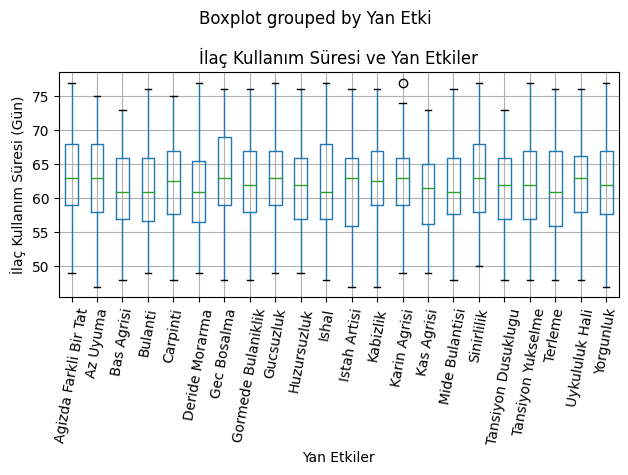

In [400]:
# kullanım sürelerine göre ilaç yan etkilerinin ortaya çıkış zamanlarının kutu grafiği ile gösterilmesi
plt.figure(figsize=(8, 6))
df.boxplot(column='Ilac Kullanim Suresi (Gun)', by='Yan Etki')
plt.title('İlaç Kullanım Süresi ve Yan Etkiler')
plt.xlabel('Yan Etkiler')
plt.ylabel('İlaç Kullanım Süresi (Gün)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

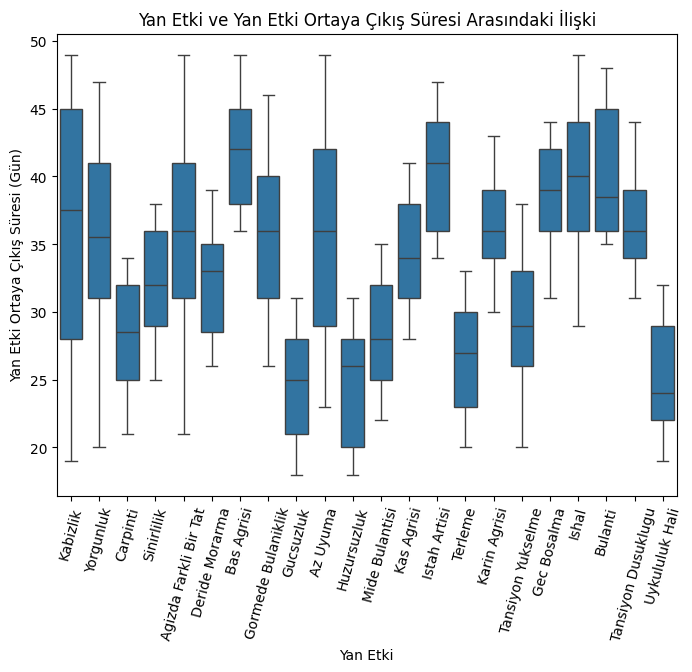

In [401]:
# Yan etkilerin ortaya çıkış süresinin kutu grafiği ile gösterilmesi
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Yan Etki', y='Yan Etki Ortaya Cikis Suresi (Gun)')
plt.title('Yan Etki ve Yan Etki Ortaya Çıkış Süresi Arasındaki İlişki')
plt.xlabel('Yan Etki')
plt.ylabel('Yan Etki Ortaya Çıkış Süresi (Gün)')
plt.xticks(rotation=75)
plt.show()

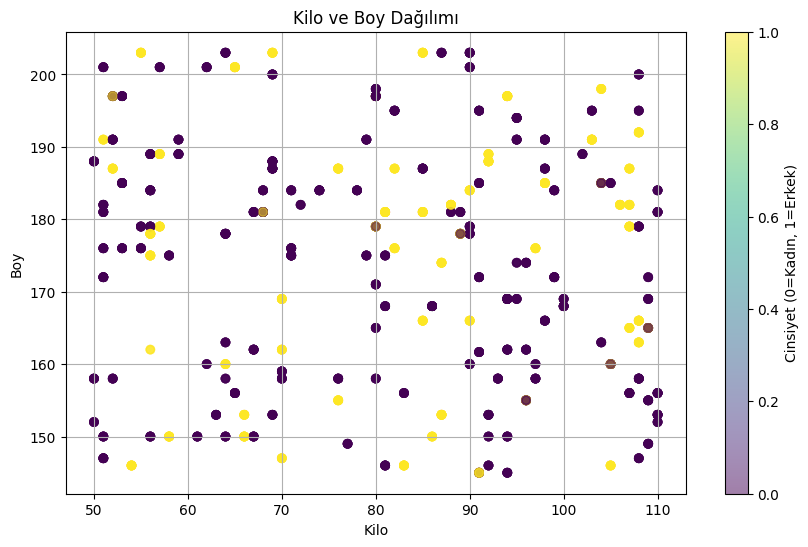

In [402]:
# cinsiyete göre kilo ve boy dağılımı grafiği
plt.figure(figsize=(10, 6))
plt.scatter(df['Kilo'], df['Boy'], c=df['Cinsiyet_Male'], alpha=0.5, cmap='viridis')
plt.title('Kilo ve Boy Dağılımı')
plt.xlabel('Kilo')
plt.ylabel('Boy')
plt.colorbar(label='Cinsiyet (0=Kadın, 1=Erkek)')
plt.grid()
plt.show()

In [606]:
# yan etkiden sonra ilacın kullanım süresinin hesaplanması
df['Yan Etkiden Sonra Kullanim Suresi (Gun)'] = (df ['Ilac Bitis Tarihi'] - df['Yan Etki Bildirim Tarihi']).dt.days
df.head()

,Uyruk,Il,Ilac Adi,Ilac Baslangic Tarihi,Ilac Bitis Tarihi,Yan Etki,Yan Etki Bildirim Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,...,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Ailedeki Kronik Hastaliklar,Cinsiyet_Male,Yan Etkiden Sonra Kullanim Suresi (Gun)
0,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",...,"Kemik Erimesi, Guatr",B RH-,103.0,191.0,64.0,54,41,"Guatr, Hipertansiyon, KOAH, Kalp Hastaliklari,...",1.0,12
1,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,Yok,"Guatr, Diger",...,"KOAH, Diyabet",Belirtilmemiş,81.0,181.0,85.0,58,25,"Diger, Diyabet, Guatr, Hipertansiyon, KOAH, Ka...",1.0,32
2,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH",...,Diger,B RH-,93.0,158.0,47.0,60,24,"Diger, Diyabet, KOAH, Kemik Erimesi",0.0,35
3,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",...,"Kalp Hastaliklari, Kanser",AB RH-,109.0,165.0,47.0,67,35,"Astim, Diger, Kalp Hastaliklari, Kanser",1.0,31
4,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,Yok,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon",...,"Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,48.0,52,30,"Alzheimer, Diger, Diyabet, Hipertansiyon, Kan ...",0.0,21


In [607]:
# tahminlerde ayırt edici olarak kullanılma olasılığı düşük sütunların kaldırılması
df.drop(columns=['Uyruk', 'Il', 'Ilac Baslangic Tarihi', 'Ilac Bitis Tarihi', 'Yan Etki Bildirim Tarihi'], inplace=True)
df.drop(columns=['Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari'], inplace=True)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Ilac Adi                                 2357 non-null   object 
 1   Yan Etki                                 2357 non-null   object 
 2   Alerjilerim                              2357 non-null   object 
 3   Kronik Hastaliklarim                     2357 non-null   object 
 4   Kan Grubu                                2357 non-null   object 
 5   Kilo                                     2357 non-null   float64
 6   Boy                                      2357 non-null   float64
 7   Yas                                      2357 non-null   float64
 8   Ilac Kullanim Suresi (Gun)               2357 non-null   int64  
 9   Yan Etki Ortaya Cikis Suresi (Gun)       2357 non-null   int64  
 10  Ailedeki Kronik Hastaliklar              2357 no

In [406]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilo,2357.0,81.370386,18.647404,50.0,65.0,85.0,96.0,110.0
Boy,2357.0,174.777966,16.425049,145.0,160.0,178.0,187.0,203.0
Yas,2357.0,49.364871,20.071754,13.0,32.0,51.0,65.0,85.0
Ilac Kullanim Suresi (Gun),2357.0,62.234620,6.576611,47.0,58.0,62.0,67.0,77.0
Yan Etki Ortaya Cikis Suresi (Gun),2357.0,33.818838,7.381251,18.0,28.0,34.0,39.0,49.0
Cinsiyet_Male,2357.0,0.299958,0.458336,0.0,0.0,0.0,1.0,1.0
Yan Etkiden Sonra Kullanim Suresi (Gun),2357.0,27.415783,8.042664,10.0,22.0,27.0,33.0,45.0


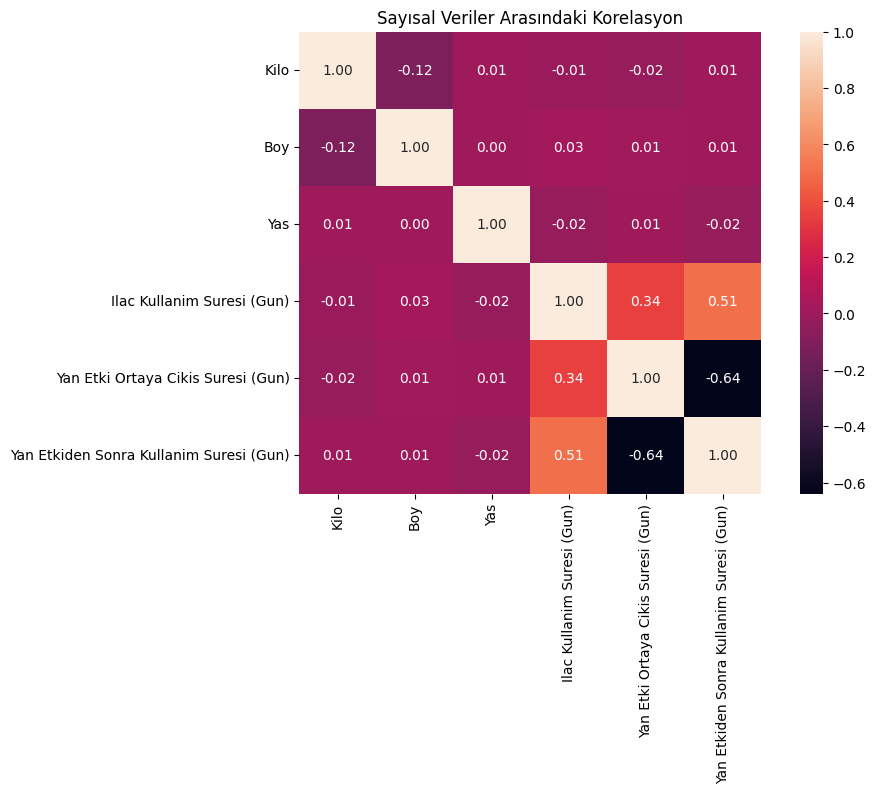

In [407]:
correlation_matrix = df[['Kilo', 'Boy', 'Yas', 'Ilac Kullanim Suresi (Gun)', 'Yan Etki Ortaya Cikis Suresi (Gun)','Yan Etkiden Sonra Kullanim Suresi (Gun)']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Sayısal Veriler Arasındaki Korelasyon')
plt.show()

In [608]:
scaler = StandardScaler()
df[['Kilo', 'Boy', 'Yas']] = scaler.fit_transform(df[['Kilo', 'Boy', 'Yas']])
df.head()

,Ilac Adi,Yan Etki,Alerjilerim,Kronik Hastaliklarim,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Ailedeki Kronik Hastaliklar,Cinsiyet_Male,Yan Etkiden Sonra Kullanim Suresi (Gun)
0,trifluoperazine,Kabizlik,Ceviz,"Hipertansiyon, Kan Hastaliklari",B RH-,1.160172,0.987849,0.729295,54,41,"Guatr, Hipertansiyon, KOAH, Kalp Hastaliklari,...",1.0,12
1,fluphenazine hcl,Yorgunluk,Toz,Yok,Belirtilmemiş,-0.019867,0.378894,1.775764,58,25,"Diger, Diyabet, Guatr, Hipertansiyon, KOAH, Ka...",1.0,32
2,warfarin sodium,Carpinti,Muz,"Kalp Hastaliklari, Diyabet",B RH-,0.623791,-1.021703,-0.117846,60,24,"Diger, Diyabet, KOAH, Kemik Erimesi",0.0,35
3,valproic acid,Sinirlilik,Pancar,"Diyabet, Diger",AB RH-,1.482001,-0.595435,-0.117846,67,35,"Astim, Diger, Kalp Hastaliklari, Kanser",1.0,31
4,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,"Diyabet, Kalp Hastaliklari",AB RH-,0.945620,-0.169166,-0.068014,52,30,"Alzheimer, Diger, Diyabet, Hipertansiyon, Kan ...",0.0,21


In [609]:
scaler = StandardScaler()
df[['Ilac Kullanim Suresi (Gun)', 'Yan Etki Ortaya Cikis Suresi (Gun)', 'Yan Etkiden Sonra Kullanim Suresi (Gun)']] = scaler.fit_transform(df[['Ilac Kullanim Suresi (Gun)', 'Yan Etki Ortaya Cikis Suresi (Gun)', 'Yan Etkiden Sonra Kullanim Suresi (Gun)']])
df.head()

,Ilac Adi,Yan Etki,Alerjilerim,Kronik Hastaliklarim,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Ailedeki Kronik Hastaliklar,Cinsiyet_Male,Yan Etkiden Sonra Kullanim Suresi (Gun)
0,trifluoperazine,Kabizlik,Ceviz,"Hipertansiyon, Kan Hastaliklari",B RH-,1.160172,0.987849,0.729295,-1.252373,0.973099,"Guatr, Hipertansiyon, KOAH, Kalp Hastaliklari,...",1.0,-1.917158
1,fluphenazine hcl,Yorgunluk,Toz,Yok,Belirtilmemiş,-0.019867,0.378894,1.775764,-0.644028,-1.195015,"Diger, Diyabet, Guatr, Hipertansiyon, KOAH, Ka...",1.0,0.570108
2,warfarin sodium,Carpinti,Muz,"Kalp Hastaliklari, Diyabet",B RH-,0.623791,-1.021703,-0.117846,-0.339855,-1.330523,"Diger, Diyabet, KOAH, Kemik Erimesi",0.0,0.943198
3,valproic acid,Sinirlilik,Pancar,"Diyabet, Diger",AB RH-,1.482001,-0.595435,-0.117846,0.724749,0.160056,"Astim, Diger, Kalp Hastaliklari, Kanser",1.0,0.445745
4,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,"Diyabet, Kalp Hastaliklari",AB RH-,0.945620,-0.169166,-0.068014,-1.556545,-0.517480,"Alzheimer, Diger, Diyabet, Hipertansiyon, Kan ...",0.0,-0.797888


In [610]:
df['Kronik Hastaliklarim'] = df['Kronik Hastaliklarim'].apply(lambda x: x.split(', ') if x else [])
df['Ailedeki Kronik Hastaliklar'] = df['Ailedeki Kronik Hastaliklar'].apply(lambda x: x.split(', ') if x else [])

In [611]:
mlb = MultiLabelBinarizer()
kronik_hastaliklar_encoded = pd.DataFrame(mlb.fit_transform(df['Kronik Hastaliklarim']),
                                          columns=[f'Kronik_{disease}' for disease in mlb.classes_])
aile_hastaliklar_encoded = pd.DataFrame(mlb.fit_transform(df['Ailedeki Kronik Hastaliklar']),
                                        columns=[f'Aile_{disease}' for disease in mlb.classes_])

In [612]:
df = pd.concat([df, kronik_hastaliklar_encoded, aile_hastaliklar_encoded], axis=1)
df.drop(columns=['Kronik Hastaliklarim', 'Ailedeki Kronik Hastaliklar'],inplace=True)
df.head()

,Ilac Adi,Yan Etki,Alerjilerim,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Cinsiyet_Male,...,Aile_Astim,Aile_Diger,Aile_Diyabet,Aile_Guatr,Aile_Hipertansiyon,Aile_KOAH,Aile_Kalp Hastaliklari,Aile_Kan Hastaliklari,Aile_Kanser,Aile_Kemik Erimesi
0,trifluoperazine,Kabizlik,Ceviz,B RH-,1.160172,0.987849,0.729295,-1.252373,0.973099,1.0,...,0,0,0,1,1,1,1,0,0,1
1,fluphenazine hcl,Yorgunluk,Toz,Belirtilmemiş,-0.019867,0.378894,1.775764,-0.644028,-1.195015,1.0,...,0,1,1,1,1,1,1,0,0,0
2,warfarin sodium,Carpinti,Muz,B RH-,0.623791,-1.021703,-0.117846,-0.339855,-1.330523,0.0,...,0,1,1,0,0,1,0,0,0,1
3,valproic acid,Sinirlilik,Pancar,AB RH-,1.482001,-0.595435,-0.117846,0.724749,0.160056,1.0,...,1,1,0,0,0,0,1,0,1,0
4,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,AB RH-,0.945620,-0.169166,-0.068014,-1.556545,-0.517480,0.0,...,0,1,1,0,1,0,0,1,0,1


In [613]:
df = pd.get_dummies(df, columns= ['Yan Etki'], dtype = float, prefix='Yan_Etki')
df.head()

,Ilac Adi,Alerjilerim,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Cinsiyet_Male,Yan Etkiden Sonra Kullanim Suresi (Gun),...,Yan_Etki_Kabizlik,Yan_Etki_Karin Agrisi,Yan_Etki_Kas Agrisi,Yan_Etki_Mide Bulantisi,Yan_Etki_Sinirlilik,Yan_Etki_Tansiyon Dusuklugu,Yan_Etki_Tansiyon Yukselme,Yan_Etki_Terleme,Yan_Etki_Uykululuk Hali,Yan_Etki_Yorgunluk
0,trifluoperazine,Ceviz,B RH-,1.160172,0.987849,0.729295,-1.252373,0.973099,1.0,-1.917158,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fluphenazine hcl,Toz,Belirtilmemiş,-0.019867,0.378894,1.775764,-0.644028,-1.195015,1.0,0.570108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,warfarin sodium,Muz,B RH-,0.623791,-1.021703,-0.117846,-0.339855,-1.330523,0.0,0.943198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,valproic acid,Pancar,AB RH-,1.482001,-0.595435,-0.117846,0.724749,0.160056,1.0,0.445745,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,carbamazepine extended release,Yok,AB RH-,0.945620,-0.169166,-0.068014,-1.556545,-0.517480,0.0,-0.797888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [614]:
df = pd.get_dummies(df, columns= ['Alerjilerim'], dtype = float, prefix='Alerjilerim')
df.head()

,Ilac Adi,Kan Grubu,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Cinsiyet_Male,Yan Etkiden Sonra Kullanim Suresi (Gun),Kronik_Alzheimer,...,Alerjilerim_Kopek,Alerjilerim_Laktoz,Alerjilerim_Lateks,Alerjilerim_Muz,Alerjilerim_Pancar,Alerjilerim_Sari Kantaron,Alerjilerim_Sut,Alerjilerim_Toz,Alerjilerim_Yogurt,Alerjilerim_Yok
0,trifluoperazine,B RH-,1.160172,0.987849,0.729295,-1.252373,0.973099,1.0,-1.917158,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fluphenazine hcl,Belirtilmemiş,-0.019867,0.378894,1.775764,-0.644028,-1.195015,1.0,0.570108,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,warfarin sodium,B RH-,0.623791,-1.021703,-0.117846,-0.339855,-1.330523,0.0,0.943198,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,valproic acid,AB RH-,1.482001,-0.595435,-0.117846,0.724749,0.160056,1.0,0.445745,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,carbamazepine extended release,AB RH-,0.945620,-0.169166,-0.068014,-1.556545,-0.517480,0.0,-0.797888,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [620]:
df.drop(columns=['Kan Grubu'], inplace=True)
df.head()

,Ilac Adi,Kilo,Boy,Yas,Ilac Kullanim Suresi (Gun),Yan Etki Ortaya Cikis Suresi (Gun),Cinsiyet_Male,Yan Etkiden Sonra Kullanim Suresi (Gun),Kronik_Alzheimer,Kronik_Astim,...,Alerjilerim_Kopek,Alerjilerim_Laktoz,Alerjilerim_Lateks,Alerjilerim_Muz,Alerjilerim_Pancar,Alerjilerim_Sari Kantaron,Alerjilerim_Sut,Alerjilerim_Toz,Alerjilerim_Yogurt,Alerjilerim_Yok
0,138,1.160172,0.987849,0.729295,-1.252373,0.973099,1.0,-1.917158,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68,-0.019867,0.378894,1.775764,-0.644028,-1.195015,1.0,0.570108,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,146,0.623791,-1.021703,-0.117846,-0.339855,-1.330523,0.0,0.943198,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,140,1.482001,-0.595435,-0.117846,0.724749,0.160056,1.0,0.445745,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,26,0.945620,-0.169166,-0.068014,-1.556545,-0.517480,0.0,-0.797888,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
